# North Wind Trading Co.

## SQL Queries Using SqLite3
### Northwind ERD
<img src='./northwind_ERD.png'>

### Importing sqlite database

In [1]:
import sqlite3
conn = sqlite3.connect('Northwind_small.sqlite')
c = conn.cursor()

### List of Tables

In [2]:
c.execute('''
SELECT name
FROM sqlite_master
WHERE type='table';
''').fetchall()

[('Employee',),
 ('Category',),
 ('Customer',),
 ('Shipper',),
 ('Supplier',),
 ('Order',),
 ('Product',),
 ('OrderDetail',),
 ('CustomerCustomerDemo',),
 ('CustomerDemographic',),
 ('Region',),
 ('Territory',),
 ('EmployeeTerritory',)]

## SQL for EDA
List of the columns in OrderDetail

In [3]:
c.execute('''
PRAGMA table_info(OrderDetail)
''').fetchall()

[(0, 'Id', 'VARCHAR(8000)', 0, None, 1),
 (1, 'OrderId', 'INTEGER', 1, None, 0),
 (2, 'ProductId', 'INTEGER', 1, None, 0),
 (3, 'UnitPrice', 'DECIMAL', 1, None, 0),
 (4, 'Quantity', 'INTEGER', 1, None, 0),
 (5, 'Discount', 'DOUBLE', 1, None, 0)]

SQL has some native functions that can be used for EDA, which we will explor here. The following function that we will be using will be:

* Min
* Max
* Average

In [4]:
c.execute('''
SELECT Discount, COUNT(Discount)
FROM OrderDetail
GROUP BY Discount
ORDER BY Discount;
''').fetchall()

[(0.0, 1317),
 (0.01, 1),
 (0.02, 2),
 (0.03, 3),
 (0.04, 1),
 (0.05, 185),
 (0.06, 1),
 (0.1, 173),
 (0.15, 157),
 (0.2, 161),
 (0.25, 154)]

In [5]:
c.execute('''
SELECT AVG(Discount), MIN(Discount), MAX(Discount)
FROM OrderDetail;
''').fetchall()

[(0.05616705336426916, 0.0, 0.25)]

Avg: .06

Min: 0.0

Max: 0.25

The average discount per order is 6%, but looking at the orders. As there is no native median function is SQL we will do the remaining EDA using Pandas and Numpy.

## Importing Pandas & Numpy for EDA

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
orders = pd.read_sql_query('''
SELECT *
FROM OrderDetail;
''', conn)

In [8]:
orders.head()

,Id,OrderId,ProductId,UnitPrice,Quantity,Discount
0,10248/11,10248,11,14.0,12,0.0
1,10248/42,10248,42,9.8,10,0.0
2,10248/72,10248,72,34.8,5,0.0
3,10249/14,10249,14,18.6,9,0.0
4,10249/51,10249,51,42.4,40,0.0


In [9]:
orders.Discount.value_counts()

0.00    1317
0.05     185
0.10     173
0.20     161
0.15     157
0.25     154
0.03       3
0.02       2
0.01       1
0.04       1
0.06       1
Name: Discount, dtype: int64

In [10]:
orders.describe()

,OrderId,ProductId,UnitPrice,Quantity,Discount
count,2155.000000,2155.000000,2155.000000,2155.000000,2155.000000
mean,10659.375870,40.793039,26.218520,23.812993,0.056167
std,241.378032,22.159019,29.827418,19.022047,0.083450
min,10248.000000,1.000000,2.000000,1.000000,0.000000
25%,10451.000000,22.000000,12.000000,10.000000,0.000000
50%,10657.000000,41.000000,18.400000,20.000000,0.000000
75%,10862.500000,60.000000,32.000000,30.000000,0.100000
max,11077.000000,77.000000,263.500000,130.000000,0.250000


### Visual EDA Using Matplotlib & Seaborn

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [12]:
discount_false = orders[orders['Discount'] == 0.0]
discount_true = orders[orders['Discount'] > 0.0]

In [13]:
discount_false.head()

,Id,OrderId,ProductId,UnitPrice,Quantity,Discount
0,10248/11,10248,11,14.0,12,0.0
1,10248/42,10248,42,9.8,10,0.0
2,10248/72,10248,72,34.8,5,0.0
3,10249/14,10249,14,18.6,9,0.0
4,10249/51,10249,51,42.4,40,0.0


In [14]:
discount_true.head()

,Id,OrderId,ProductId,UnitPrice,Quantity,Discount
6,10250/51,10250,51,42.4,35,0.15
7,10250/65,10250,65,16.8,15,0.15
8,10251/22,10251,22,16.8,6,0.05
9,10251/57,10251,57,15.6,15,0.05
11,10252/20,10252,20,64.8,40,0.05


### Histograms

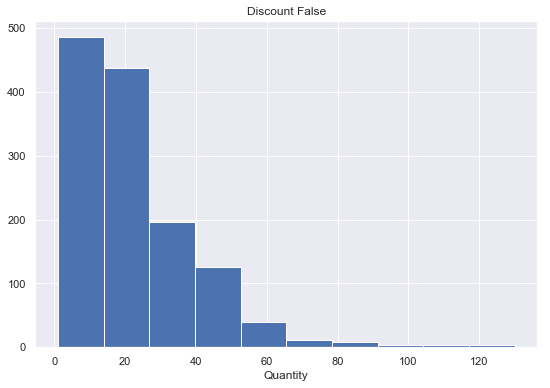

In [15]:
_ = plt.figure(figsize=(9,6))
_ = plt.hist(discount_false['Quantity'])
_ = plt.title('Discount False')
_ = plt.xlabel('Quantity')
plt.show()

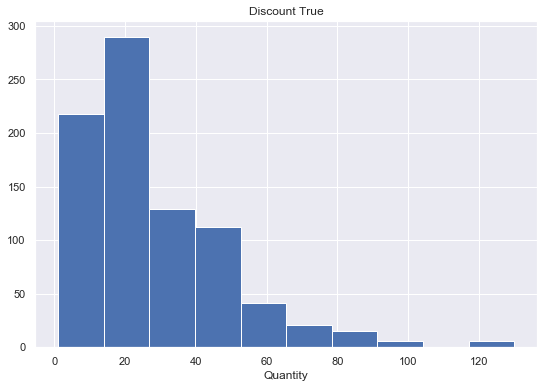

In [16]:
_ = plt.figure(figsize=(9,6))
_ = plt.hist(discount_true['Quantity'])
_ = plt.title('Discount True')
_ = plt.xlabel('Quantity')
plt.show()

### Bee Swarm Plot

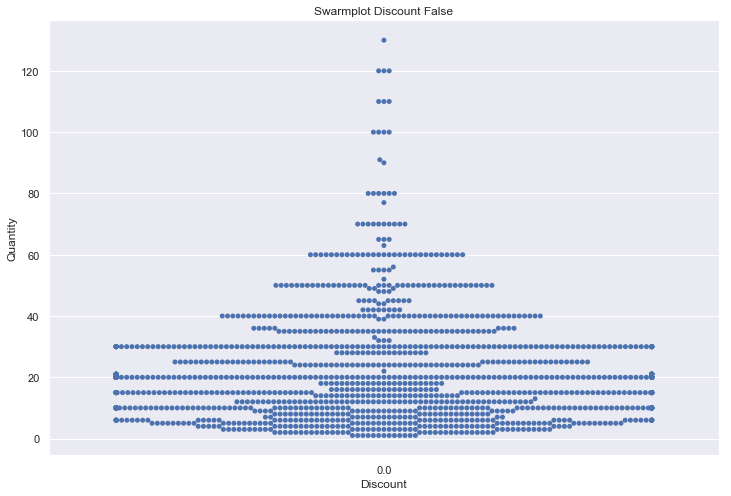

In [17]:
sns.set()
plt.figure(figsize=(12, 8))
sns.swarmplot(x=discount_false['Discount'], y=discount_false['Quantity'])
plt.title('Swarmplot Discount False')
plt.show()

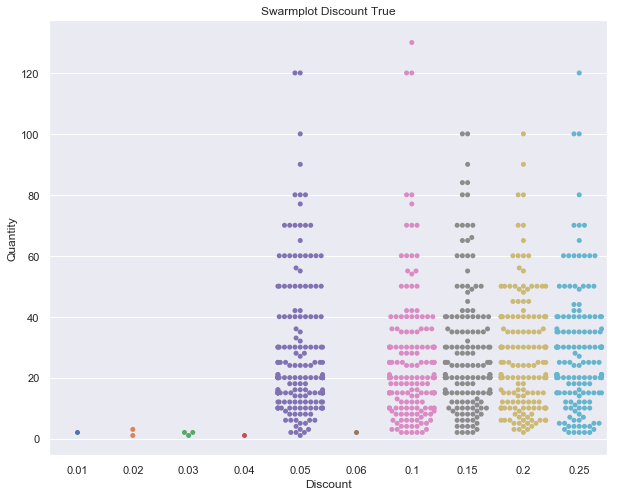

In [18]:
plt.figure(figsize=(10, 8))
sns.swarmplot(x=discount_true['Discount'], y=discount_true['Quantity'])
plt.title('Swarmplot Discount True')
plt.show()

### Empirical Cumulative Distribution Functions (ECDF)

In [19]:
def ecdf(data):
    '''
    Computes the ECDF for a given dataset.
    
    data: a list or array.
    
    returns: x, y
    '''
    n = len(data)
    x = np.sort(data)
    y = np.arange(1, n + 1) / n
    
    return x, y

In [20]:
quantity_x, quantity_y = ecdf(discount_false['Quantity'])

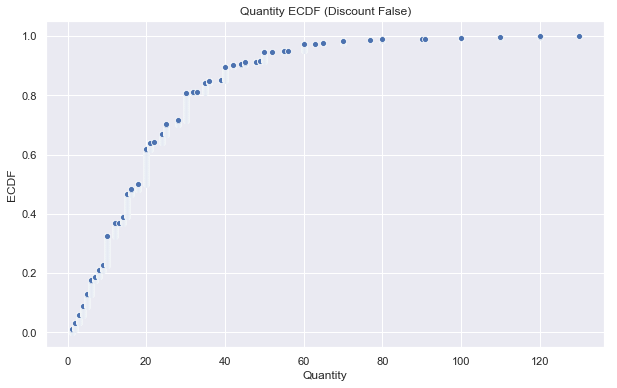

In [21]:
_ = plt.figure(figsize=(10,6))
_ = sns.scatterplot(x=quantity_x, y=quantity_y)
_ = plt.title('Quantity ECDF (Discount False)')
_ = plt.xlabel('Quantity')
_ = plt.ylabel('ECDF')

plt.show()

In [22]:
dis_true_x, dis_true_y = ecdf(discount_true['Quantity'])

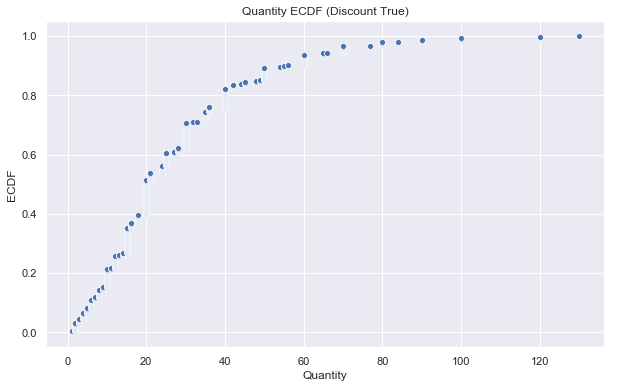

In [23]:
_ = plt.figure(figsize=(10,6))
_ = sns.scatterplot(x=dis_true_x, y=dis_true_y)
_ = plt.title('Quantity ECDF (Discount True)')
_ = plt.xlabel('Quantity')
_ = plt.ylabel('ECDF')

plt.show()

### Box Plots

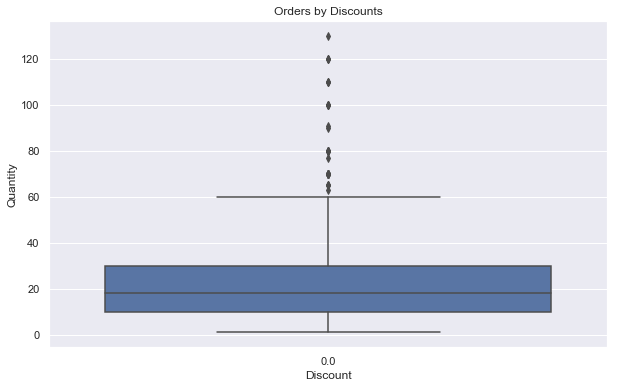

In [24]:
_ = plt.figure(figsize=(10,6))
_ = sns.boxplot(x=discount_false['Discount'], y=discount_false['Quantity'])
_ = plt.title('Orders by Discounts')
plt.show()

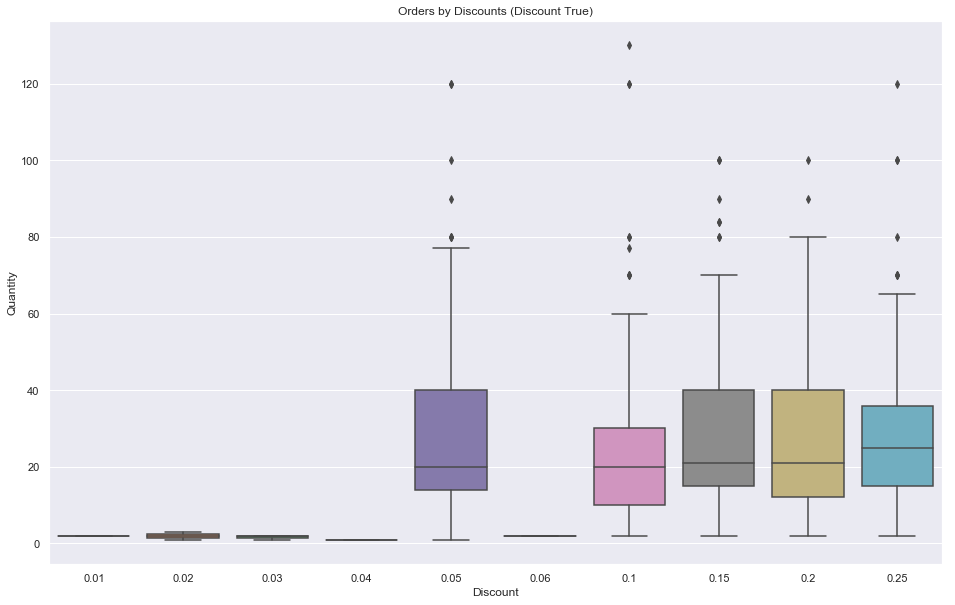

In [25]:
_ = plt.figure(figsize=(16, 10))
_ = sns.boxplot(x=discount_true['Discount'], y=discount_true['Quantity'])
_ = plt.title('Orders by Discounts (Discount True)')
plt.show()

Add explanations to box plots.

From the EDA we can see that discounts in increments of 5% have more orders.

### Checking for Covariance

In [26]:
discount_categories = pd.get_dummies(orders['Discount'], columns='Discount')
orders_new = pd.concat([orders, discount_categories], axis=1)
orders_new.drop(columns='Discount', inplace=True)

In [27]:
def pearson_r(data1, data2):
    '''
    Computes the pearson correlation between two datasets
    
    returns: covariance
    '''
    return np.corrcoef(data1, data2)[0,1]

In [28]:
discount_false.isna().sum()

Id           0
OrderId      0
ProductId    0
UnitPrice    0
Quantity     0
Discount     0
dtype: int64

In [29]:
discount_false['Quantity'].corr(discount_false['Discount'])

nan

In [30]:
discount_corr = pearson_r(discount_false['Discount'], discount_false['Quantity'])
print(f' Pearson Correlation w/ No Discounts: {discount_corr}')

 Pearson Correlation w/ No Discounts: nan


C:\Users\nitdip\Anaconda3\lib\site-packages\numpy\lib\function_base.py:2400: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
C:\Users\nitdip\Anaconda3\lib\site-packages\numpy\lib\function_base.py:2401: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]


In [31]:
no_discount_corr = pearson_r(discount_true['Discount'], discount_true['Quantity'])
print(f' Pearson Correlation w/ No Discounts: {no_discount_corr}')

 Pearson Correlation w/ No Discounts: 0.03251410765060549


### Hacker Statistics

Generate samples of quantities form the OrderDetail table then compare them to the original data.

In [32]:
def bootstrap(data, func, size=1):
    '''
    Creates a random sample from data using numpy's
    np.random.choice() method.
    
    data: a dataset to generate replicates
    func: type of func to pass(np.mean, np.median, np.std)
    size: how many samples to generate
    '''
    sample = np.random.choice(data, len(data))
    return func(sample)

In [33]:
def bootstrap_sample(data, func, size=1):
    '''
    Generates multiple replicates using the replicate function.
    
    data: a dataset to generate replicates
    func: type of func to pass(mean, median, std)
    size: how many samples to generate    
    '''
    # initialize empty array to store replicates
    sample = np.empty(shape=size)
    
    # for loop to generate a replica for the given size
    for i in range(size):
        sample[i] = bootstrap(data, func)
        
    return sample

Standard Error of Mean: 0.4096687388075916
Standard deviation: 0.4123250953403826
Mean: 23.82166872389791


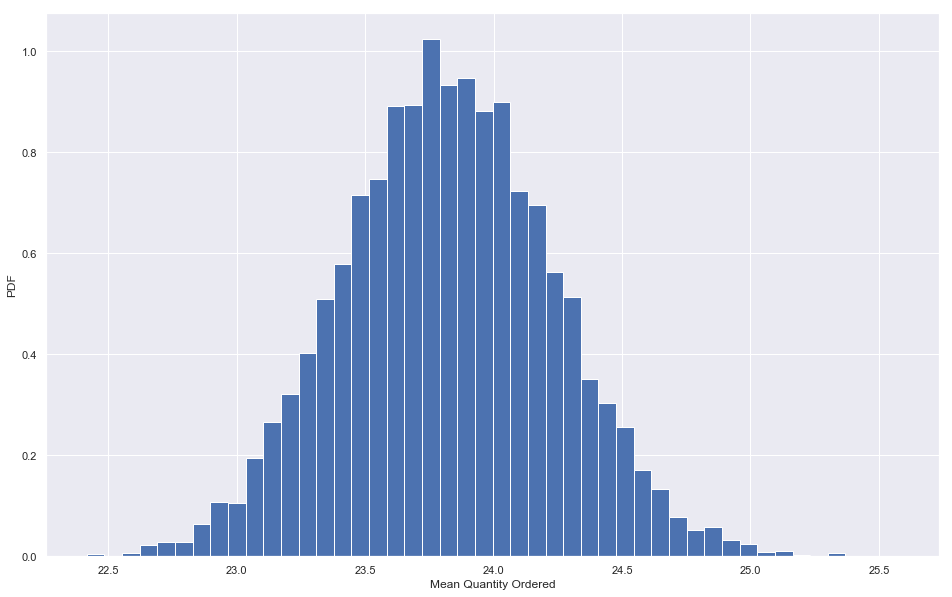

In [34]:
quantity = orders['Quantity']
# take 10000 mean replicas from Quantity
qty_sample = bootstrap_sample(quantity, np.mean, 10000)

# computing the standard error of the mean
sem = np.std(quantity) / np.sqrt(len(quantity))
print(f'Standard Error of Mean: {sem}')

std_sample = np.std(qty_sample)
print(f'Standard deviation: {std_sample}')
print(f'Mean: {np.mean(qty_sample)}')

# Histogram to show results
_ = plt.figure(figsize=(16, 10))
_ = plt.hist(qty_sample, bins=int(np.sqrt(len(quantity))), density=True)
_ = plt.xlabel('Mean Quantity Ordered')
_ = plt.ylabel('PDF')

plt.show()

### Confidence Interval

Computing the 95% confidence interval.

In [35]:
np.percentile(qty_sample, [2.5, 97.5])

array([23.03060325, 24.63484919])

### Linear Regression 

In [36]:
def lin_reg_sample_pairs(x, y, size=1):
    '''
    Perform pair sampling for linear regression
    
    size: number of samples
    '''
    
    # create indices for the same size as x.
    indices = np.arange(len(x))
    
    # empty arrays to store slopes and intercepts
    slopes = np.empty(size)
    intercepts = np.empty(size)
    
    # for loop to generate replicas
    for i in range(size):
        index = np.random.choice(indices, size=len(x))
        sample_x, sample_y = x[indices], y[indices]
        slopes[i], slopes[i] = np.polyfit(sample_x, sample_y, deg=1)
        
    return slopes, intercepts

In [37]:
# generate samples of slopes and intercepts using the above function.
qty_m, qty_b = lin_reg_sample_pairs(orders['Discount'], orders['Quantity'], size=1000)

In [38]:
# the confidence interval for slope and intercept
print(f'Confidence interval for slope: {np.percentile(qty_m, [2.5, 97.5])}')

Confidence interval for slope: [22.16682896 22.16682896]


In [39]:
def permutation_data(data1, data2):
    '''
    Generate a permuation sample from two datasets.
    
    data1: a 1D array
    data2: a 1D array
    
    returns permuted_data1, permuted_data2
    '''
    
    #concatenate 2 datasets
    data = np.concatenate((data1, data2))
    
    # permute the concatenated array
    permuted_array = np.random.permutation(data)
    
    # split the data into the original sizes
    perm_data1 = permuted_array[:len(data1)]
    perm_data2 = permuted_array[len(data1):]
    
    return perm_data1, perm_data2

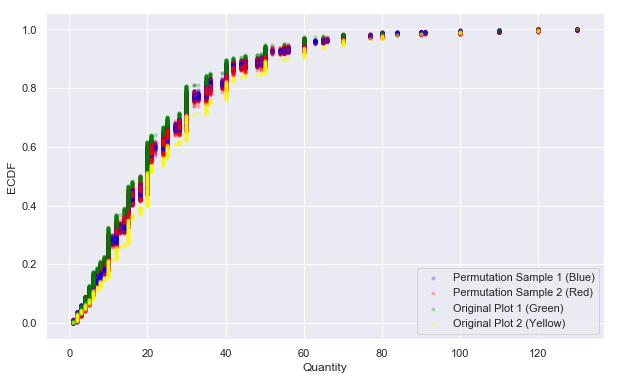

In [40]:
plt.figure(figsize=(10, 6))
for sample in range(50):
    permuted1, permuted2 = permutation_data(discount_false['Quantity'], discount_true['Quantity'])
    
    #computing ECDFs for permuted1 and permuted2
    x1, y1 = ecdf(permuted1)
    x2, y2 = ecdf(permuted2)
    
    #plotting the ECDFs
    perm_plot1 = plt.scatter(x1, y1, c='blue', s=10, alpha=0.2)
    perm_plot2 = plt.scatter(x2, y2, c='red', s=10, alpha=0.2)
    
# plot for the original dataset
ox1, oy1 = ecdf(discount_false['Quantity'])
ox2, oy2 = ecdf(discount_true['Quantity'])

orig_plot1 = plt.scatter(ox1, oy1, c='green', s=10, alpha=0.2)
orig_plot2 = plt.scatter(ox2, oy2, c='yellow', s=10, alpha=0.2)
_ = plt.xlabel('Quantity')
_ = plt.ylabel('ECDF')
_ = plt.legend([perm_plot1, perm_plot2, orig_plot1, orig_plot2] , 
               ['Permutation Sample 1 (Blue)', 'Permutation Sample 2 (Red)', 
                'Original Plot 1 (Green)', 'Original Plot 2 (Yellow)'], loc=4)

plt.show()

The distributions of the datasets [Permutation Sample 1, Permutation Sample 2, Original 1, Original 2] have the same distribution because the points overlap. This is verified by the histogram and ECDFs created earlier in the notebook.

In [41]:
def permutation_replicates(data1, data2, func, size=1):
    '''
    Generate multiple permutation replicates from a sample distribution.
    
    data1: a numpy array
    data2: a numpy array
    func: a numpy function(np.mean, np.std, np.var, etc...)
    size: number of replicates to generate
    
    returns: perm_replicates
    '''
    
    # initialize an empty array with the size parameter
    replicates = np.empty(size)
    
    # for loop to generate replicates to put into replicates array
    for i in range(size):
        sample1, sample2 = permutation_data(data1, data2)
        
        # Compute the test statistic for each iteration and then add
        # to replicates array
        replicates[i] = func(sample1, sample2)
        
    return replicates

In [42]:
def diff_of_mean(data1, data2):
    '''
    Calculate the difference of means between two means.
    
    data1: an array
    data2: an array
    
    returns: diff
    '''
    
    diff = np.mean(data1) - np.mean(data2)
    
    return diff

## Hypothesis Testing

In [43]:
# the pearson correlation between quantity and discount
qty_corr = pearson_r(discount_true['Discount'], discount_true['Quantity'])
print(f'Pearson Coefficient: {qty_corr}')

Pearson Coefficient: 0.03251410765060549


> H0: $\rho_0 \geq \rho_1$
The pearson correlation between discounts and quantities ordered is greater than or equal 4.84%


> H1: $\rho_0 < \rho_1$
The pearson correlation between discounts and quantities ordered is less than 4.84%

In [44]:
# initialize empty permutation array of 10000
permutation_arr = np.empty(10000)

# for loop to create samples of the pearson coefficient
for i in range(10000):
    
    #quantity & discount pearson coefficient samples
    qty_sample = np.random.permutation(orders['Quantity'])
    
    # calculates the pearson coeffificent for each sample 
    # distribution and stores it into qty_sample
    permutation_arr[i] = pearson_r(orders['Discount'], qty_sample)
    
p_value = np.sum(permutation_arr >= qty_corr) / len(permutation_arr)

if p_value <= 0.05:
    print(f'P-value: {p_value}, Reject null hypothesis')
else:
    print(f'P-value: {p_value}, Fail to reject null hypothesis')

P-value: 0.0639, Fail to reject null hypothesis


In [45]:
print(f'''With a P-value of {p_value} we reject the null hypothesis and that there is a correlation between discounts and the amount of quantities ordered.

Now we shall explore discounts!''')

With a P-value of 0.0639 we reject the null hypothesis and that there is a correlation between discounts and the amount of quantities ordered.

Now we shall explore discounts!


### More On Discounts

In [46]:
orders_new.columns

Index([       'Id',   'OrderId', 'ProductId', 'UnitPrice',  'Quantity',
               0.0,        0.01,        0.02,        0.03,        0.04,
              0.05,        0.06,         0.1,        0.15,         0.2,
              0.25],
      dtype='object')

In [47]:
# gives the pearson correlation for each discount
for i in orders_new[[0.0, 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.1, 0.15, 0.2, 0.25]]:
    pearson = pearson_r(orders_new[i], orders_new['Quantity'])
    print(f'Pearson-r for {i}: {pearson}')

Pearson-r for 0.0: -0.13828154681223415
Pearson-r for 0.01: -0.02471359635917708
Pearson-r for 0.02: -0.03495841885581478
Pearson-r for 0.03: -0.04347951866285352
Pearson-r for 0.04: -0.0258465723022074
Pearson-r for 0.05: 0.06764253433932983
Pearson-r for 0.06: -0.024713596359177078
Pearson-r for 0.1: 0.022122036961648675
Pearson-r for 0.15: 0.06734931495822906
Pearson-r for 0.2: 0.04798984871495015
Pearson-r for 0.25: 0.06458267640292961


Discounts do have a an affect on the quantity ordered, but they have to be in increments of 5% discounts and the higher the discount the more is ordered.

## Hypothesis 2
### Processing Times

In this hypothesis we look to see if the time between order placement and order shipment is in line with the numbers. We will call the days between order and shipment ProcessTime.

### Importing OrderDetail, Orders, and Product tables

In [48]:
orderdetail2 = pd.read_sql_query('''
SELECT Id, OrderDate, RequiredDate, ShippedDate
FROM [Order];
''', conn, parse_dates=['OrderDate', 'ShippedDate', 'RequiredDate'])

In [49]:
orders2 = pd.read_sql_query('''
SELECT OrderId, ProductId, Quantity
FROM OrderDetail
''', conn)

In [50]:
product2 = pd.read_sql_query('''
SELECT ProductName, Id, UnitsInStock, UnitsOnOrder,ReorderLevel, Discontinued
FROM Product;
''', conn)

### Combining the DataFrames together

In [51]:
test_df = pd.merge(orderdetail2, orders2, how=('inner'), left_on='Id', right_on='OrderId')

In [52]:
test_df2 = pd.merge(test_df, product2, how=('inner'), left_on='ProductId', right_on='Id')

In [53]:
test_df2.head()

,Id_x,OrderDate,RequiredDate,ShippedDate,OrderId,ProductId,Quantity,ProductName,Id_y,UnitsInStock,UnitsOnOrder,ReorderLevel,Discontinued
0,10248,2012-07-04,2012-08-01,2012-07-16,10248,11,12,Queso Cabrales,11,22,30,30,0
1,10296,2012-09-03,2012-10-01,2012-09-11,10296,11,12,Queso Cabrales,11,22,30,30,0
2,10327,2012-10-11,2012-11-08,2012-10-14,10327,11,50,Queso Cabrales,11,22,30,30,0
3,10353,2012-11-13,2012-12-11,2012-11-25,10353,11,12,Queso Cabrales,11,22,30,30,0
4,10365,2012-11-27,2012-12-25,2012-12-02,10365,11,24,Queso Cabrales,11,22,30,30,0


### Feature Creations: ProcessTime, TravelTime, TimeToDelivery

In [54]:
# Process time: Time from order to ship
test_df2['ProcessTime'] = test_df2['ShippedDate'] - test_df2['OrderDate']

# TravelTime: Time it takes from being shipped to reaching the customer
test_df2['TravelTime'] = test_df2['RequiredDate'] - test_df2['ShippedDate']

# TimeToDelivery: Time it takes from order date to customer 
test_df2['TimeToDelivery'] = test_df2['RequiredDate'] - test_df2['OrderDate']

# The following code changes the dateTime to integers
test_df2['ProcessTime'] = test_df2['ProcessTime'].dt.days
test_df2['TimeToDelivery'] = test_df2['TimeToDelivery'].dt.days
test_df2['TravelTime'] = test_df2['TravelTime'].dt.days
test_df2.head()

,Id_x,OrderDate,RequiredDate,ShippedDate,OrderId,ProductId,Quantity,ProductName,Id_y,UnitsInStock,UnitsOnOrder,ReorderLevel,Discontinued,ProcessTime,TravelTime,TimeToDelivery
0,10248,2012-07-04,2012-08-01,2012-07-16,10248,11,12,Queso Cabrales,11,22,30,30,0,12.0,16.0,28
1,10296,2012-09-03,2012-10-01,2012-09-11,10296,11,12,Queso Cabrales,11,22,30,30,0,8.0,20.0,28
2,10327,2012-10-11,2012-11-08,2012-10-14,10327,11,50,Queso Cabrales,11,22,30,30,0,3.0,25.0,28
3,10353,2012-11-13,2012-12-11,2012-11-25,10353,11,12,Queso Cabrales,11,22,30,30,0,12.0,16.0,28
4,10365,2012-11-27,2012-12-25,2012-12-02,10365,11,24,Queso Cabrales,11,22,30,30,0,5.0,23.0,28


In [55]:
# dropping 20 NA values
test_df2.dropna(inplace=True)

MAKE A PLOT

### EDA
**"Adventure is out there!"**

In [56]:
test_df2.describe()

,Id_x,OrderId,ProductId,Quantity,Id_y,UnitsInStock,UnitsOnOrder,ReorderLevel,Discontinued,ProcessTime,TravelTime,TimeToDelivery
count,2082.000000,2082.000000,2082.000000,2082.000000,2082.000000,2082.000000,2082.000000,2082.000000,2082.000000,2082.000000,2082.000000,2082.000000
mean,10645.182517,10645.182517,41.007205,24.072526,41.007205,39.762728,7.949087,11.899616,0.106148,8.345341,19.466378,27.811720
std,233.122319,233.122319,22.091232,18.890082,22.091232,36.062315,19.569399,10.804097,0.308101,6.692846,8.848344,5.571871
min,10248.000000,10248.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,-23.000000,14.000000
25%,10444.000000,10444.000000,22.250000,10.000000,22.250000,17.000000,0.000000,0.000000,0.000000,4.000000,18.000000,28.000000
50%,10643.000000,10643.000000,41.000000,20.000000,41.000000,25.000000,0.000000,10.000000,0.000000,7.000000,21.000000,28.000000
75%,10844.750000,10844.750000,60.000000,30.000000,60.000000,57.000000,0.000000,20.000000,0.000000,9.000000,24.000000,28.000000
max,11069.000000,11069.000000,77.000000,130.000000,77.000000,125.000000,100.000000,30.000000,1.000000,37.000000,41.000000,42.000000


### Histogram for new features

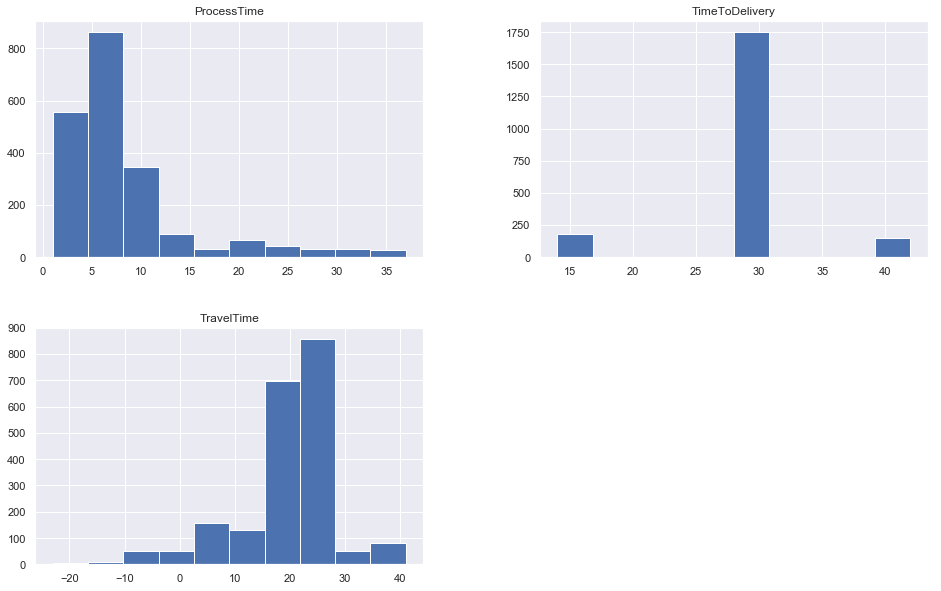

In [57]:
#histogram for ['OrderDate', 'ShippedDate', 'RequiredDate']
test_df2[['ProcessTime', 'TimeToDelivery', 'TravelTime']].hist(figsize=(16, 10));

Negative TraveTime? We shall explore!

In [58]:
# filtering the dataframe to display only orders with a negative travel time and units in stock.
test_df2[(test_df2['TravelTime'] < 0) & (test_df2['UnitsInStock'] <= 0)]

,Id_x,OrderDate,RequiredDate,ShippedDate,OrderId,ProductId,Quantity,ProductName,Id_y,UnitsInStock,UnitsOnOrder,ReorderLevel,Discontinued,ProcessTime,TravelTime,TimeToDelivery
395,10423,2013-01-23,2013-02-06,2013-02-24,10423,31,14,Gorgonzola Telino,31,0,70,20,0,32.0,-18.0,14
411,10705,2013-10-15,2013-11-12,2013-11-18,10705,31,20,Gorgonzola Telino,31,0,70,20,0,34.0,-6.0,28
757,10380,2012-12-12,2013-01-09,2013-01-16,10380,53,20,Perth Pasties,53,0,0,0,1,35.0,-7.0,28
1137,10302,2012-09-10,2012-10-08,2012-10-09,10302,17,40,Alice Mutton,17,0,0,0,1,29.0,-1.0,28
1146,10523,2013-05-01,2013-05-29,2013-05-30,10523,17,25,Alice Mutton,17,0,0,0,1,29.0,-1.0,28
1156,10727,2013-11-03,2013-12-01,2013-12-05,10727,17,20,Alice Mutton,17,0,0,0,1,32.0,-4.0,28
1280,10687,2013-09-30,2013-10-28,2013-10-30,10687,29,10,Thüringer Rostbratwurst,29,0,0,0,1,30.0,-2.0,28


In [59]:
# sorting values by Id_x(OrderId) to to see which product is holding up the processing time
test_df2.sort_values(by=['Id_x'])

,Id_x,OrderDate,RequiredDate,ShippedDate,OrderId,ProductId,Quantity,ProductName,Id_y,UnitsInStock,UnitsOnOrder,ReorderLevel,Discontinued,ProcessTime,TravelTime,TimeToDelivery
0,10248,2012-07-04,2012-08-01,2012-07-16,10248,11,12,Queso Cabrales,11,22,30,30,0,12.0,16.0,28
68,10248,2012-07-04,2012-08-01,2012-07-16,10248,72,5,Mozzarella di Giovanni,72,14,0,0,0,12.0,16.0,28
38,10248,2012-07-04,2012-08-01,2012-07-16,10248,42,10,Singaporean Hokkien Fried Mee,42,26,0,0,1,12.0,16.0,28
106,10249,2012-07-05,2012-08-16,2012-07-10,10249,14,9,Tofu,14,35,0,0,0,5.0,37.0,42
128,10249,2012-07-05,2012-08-16,2012-07-10,10249,51,40,Manjimup Dried Apples,51,20,0,10,0,5.0,37.0,42
129,10250,2012-07-08,2012-08-05,2012-07-12,10250,51,35,Manjimup Dried Apples,51,20,0,10,0,4.0,24.0,28
167,10250,2012-07-08,2012-08-05,2012-07-12,10250,41,10,Jack's New England Clam Chowder,41,85,0,10,0,4.0,24.0,28
214,10250,2012-07-08,2012-08-05,2012-07-12,10250,65,15,Louisiana Fiery Hot Pepper Sauce,65,76,0,0,0,4.0,24.0,28
215,10251,2012-07-08,2012-08-05,2012-07-15,10251,65,20,Louisiana Fiery Hot Pepper Sauce,65,76,0,0,0,7.0,21.0,28
246,10251,2012-07-08,2012-08-05,2012-07-15,10251,22,6,Gustaf's Knäckebröd,22,104,0,25,0,7.0,21.0,28


### Out of STOCK!
The negative travel times are due to Northwind not having enough in inventory to fulfill the order. We shall explore in hypothesis 3 if the amount in stock is enough to fulfill their orders.

### Hypothesis Test #2

We shall now explore to see if having missed orders are significant.

> $H_0 \leq 19$ H0: The mean travel time of orders is atmost 19 days.

> $H_1 > 19$ H1: The mean travel time of orders is more than 19 days.

In [60]:
from scipy import stats

In [61]:
# create a random sample of 
travel_arr = np.empty(shape=10000)
for i in range(10000):
    travel_sample = np.random.choice(test_df2['TravelTime'], len(test_df2['TravelTime']))
    travel_arr[i] = np.sum(travel_sample < 0) / travel_sample.size
travel_mu = np.mean(travel_arr)
travel_std = np.std(travel_arr)
print(f'distribution mean: {travel_mu}')
print(f'standard distribution: {travel_std}')

distribution mean: 0.04417949087415946
standard distribution: 0.004524545775515962


C:\Users\nitdip\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


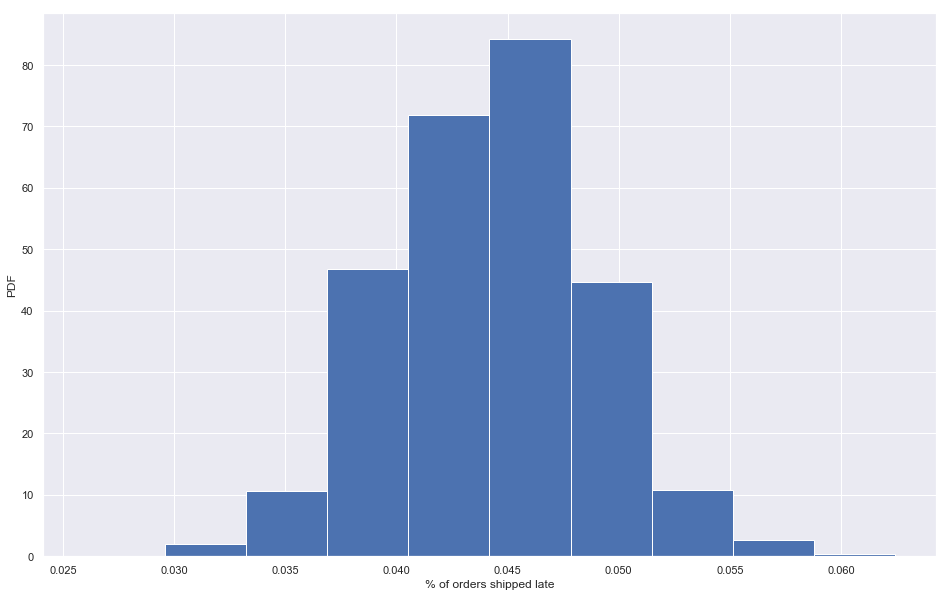

In [62]:
#creating a probability density
_ = plt.figure(figsize=(16, 10))
_ = plt.hist(travel_arr, bins=10, normed=True)
_ = plt.xlabel('% of orders shipped late')
_ = plt.ylabel('PDF')
plt.show();

In [63]:
x, y = ecdf(test_df2['TravelTime'])

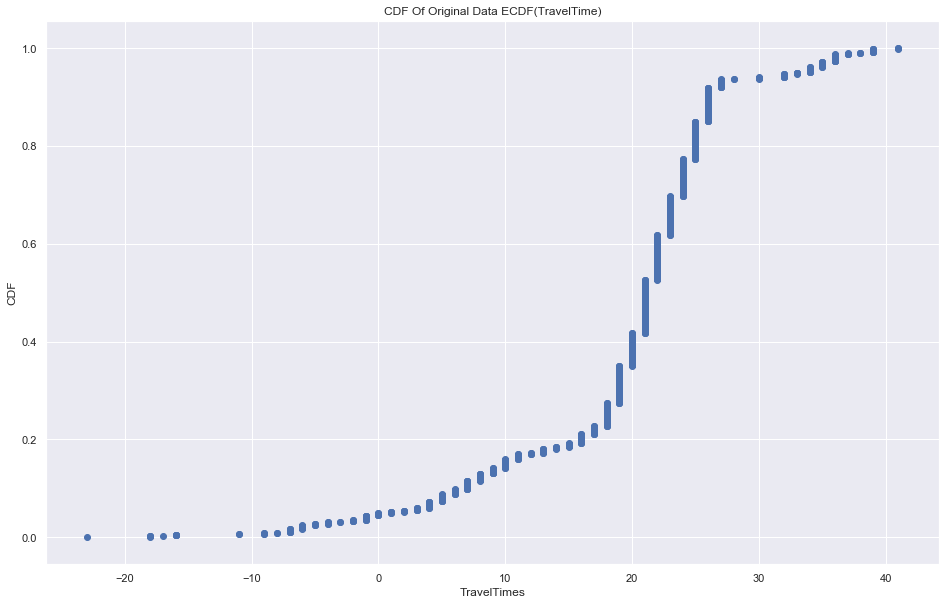

In [64]:
_ = plt.figure(figsize=(16, 10))
_ = plt.scatter(x=x, y=y)
_ = plt.xlabel('TravelTimes')
_ = plt.ylabel('CDF')
_ = plt.title('CDF Of Original Data ECDF(TravelTime)')
plt.show()

Standard Error of Mean: 0.19387300117494635
Standard deviation: 0.19517342512576982
Mean: 19.465620797310276


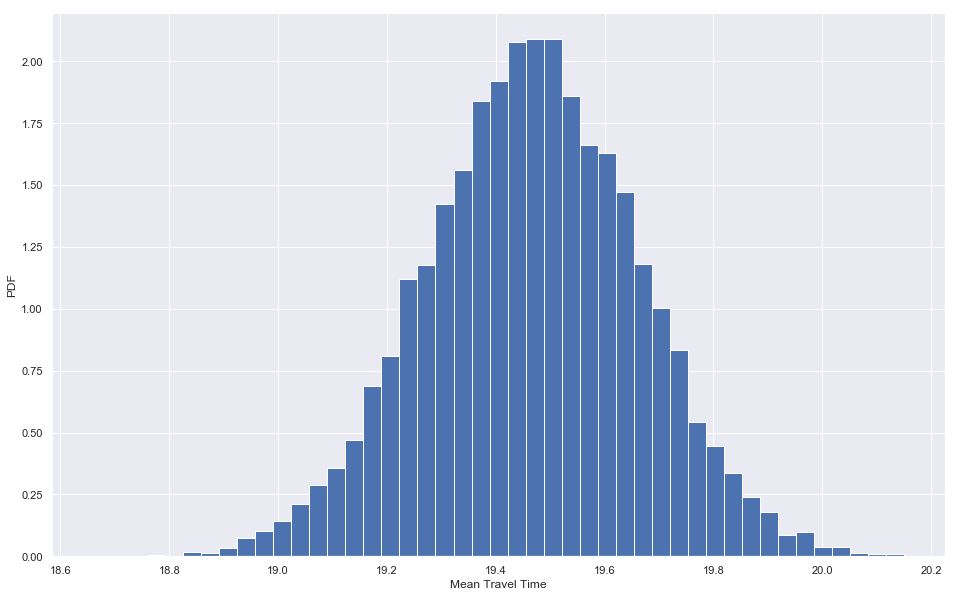

In [65]:
TravelTime = test_df2['TravelTime']
# take 10000 mean replicas from Quantity
time_replicas = bootstrap_sample(TravelTime, np.mean, 10000)

# computing the standard error of the mean
sem = np.std(TravelTime) / np.sqrt(len(TravelTime))
print(f'Standard Error of Mean: {sem}')

std_replicas = np.std(time_replicas)
print(f'Standard deviation: {std_replicas}')
time_mu = np.mean(time_replicas)
print(f'Mean: {time_mu}')

# Histogram to show results
_ = plt.figure(figsize=(16, 10))
_ = plt.hist(time_replicas, bins=int(np.sqrt(len(TravelTime))), density=True)
_ = plt.xlabel('Mean Travel Time')
_ = plt.ylabel('PDF')

plt.show()

In [66]:
def p_value(data, mu):
    '''
    Display P-value for a dataset for a given mean.
    
    data: array-like
    mu: mean of data
    '''
    t, p = stats.ttest_1samp(data, mu)
    
    if p/2 <= 0.05:
        return f'P-value of {p/2}, Reject the null hypothesis'
    else:
        return f'P-value of {p/2}, fail to reject the null hypothesis'

In [67]:
mu = round(np.mean(test_df2['TravelTime']))
print(f'The mean for TravelTime is {mu}.')
std = np.std(test_df2['TravelTime'], ddof=1)
print(f'The standard dieviation for TravelTime is {std}.')

The mean for TravelTime is 19.
The standard dieviation for TravelTime is 8.848344404437842.


### Testing the hypothesis

#### Using Permutation Tests

In [68]:
# initialize empty permutation array of 10000
permutation_arr = np.empty(10000)

# for loop to create samples of the pearson coefficient
for i in range(10000):
    
    #quantity & discount pearson coefficient samples
    sample = np.random.permutation(test_df2['TravelTime'])
    
    # calculates the pearson coeffificent for each sample 
    # distribution and stores it into qty_sample
    permutation_arr[i] = np.mean(sample)
    
p_value = np.sum(permutation_arr <= time_mu) / len(permutation_arr)

if p_value <= 0.05:
    print(f'P-value: {p_value}, Reject null hypothesis')
else:
    print(f'P-value: {p_value}, Fail to reject null hypothesis')

P-value: 0.0, Reject null hypothesis


#### Using Scipy

In [69]:
t, p = stats.ttest_1samp(test_df2['TravelTime'], time_mu)
p

0.9968828782236697

Since we have failed to reject the null hypothesis of processing times taking longer than expected, let us dig deeper into the orders that had processing times that caused orders to be shipped late.

### Hypothesis 3:

> $H_0 \leq \mu_0$ $H_0$: UnitsOnOrder mean is less than or equal to 70

> $H_1 > \mu_1$ $H_1$: UnitsOnOrder mean is greater than 70

### Product IDs that are having processing issues.

In [70]:
late_ship = test_df2[(test_df2['TravelTime'] < 0)]
prod_id = np.sort(late_ship['ProductId'].unique())
number_late = np.sort(late_ship['ProductId'].unique()).size
print(f'The number of products that are being shipped late due to lack of inventory or products being discontinued is {number_late}')
print(f'The following prodoct ids are the issue: {prod_id}')

The number of products that are being shipped late due to lack of inventory or products being discontinued is 47
The following prodoct ids are the issue: [ 2  3  4  5  6  7 11 14 16 17 18 19 22 24 26 28 29 31 34 35 36 37 38 39
 40 41 42 44 46 48 51 54 55 57 60 61 62 65 68 69 70 71 72 73 75 76 77]


In [71]:
gorgonzola_telino = test_df2[(test_df2['ProductId'] == 31)]
gorgonzola_telino.head()

,Id_x,OrderDate,RequiredDate,ShippedDate,OrderId,ProductId,Quantity,ProductName,Id_y,UnitsInStock,UnitsOnOrder,ReorderLevel,Discontinued,ProcessTime,TravelTime,TimeToDelivery
382,10253,2012-07-10,2012-07-24,2012-07-16,10253,31,20,Gorgonzola Telino,31,0,70,20,0,6.0,36.0,14
383,10272,2012-08-02,2012-08-30,2012-08-06,10272,31,40,Gorgonzola Telino,31,0,70,20,0,4.0,25.0,28
384,10273,2012-08-05,2012-09-02,2012-08-12,10273,31,15,Gorgonzola Telino,31,0,70,20,0,7.0,21.0,28
385,10325,2012-10-09,2012-10-23,2012-10-14,10325,31,4,Gorgonzola Telino,31,0,70,20,0,5.0,19.0,14
386,10335,2012-10-22,2012-11-19,2012-10-24,10335,31,25,Gorgonzola Telino,31,0,70,20,0,2.0,19.0,28


In [72]:
gorgonzola_telino[gorgonzola_telino['UnitsInStock'] > 0]

,Id_x,OrderDate,RequiredDate,ShippedDate,OrderId,ProductId,Quantity,ProductName,Id_y,UnitsInStock,UnitsOnOrder,ReorderLevel,Discontinued,ProcessTime,TravelTime,TimeToDelivery


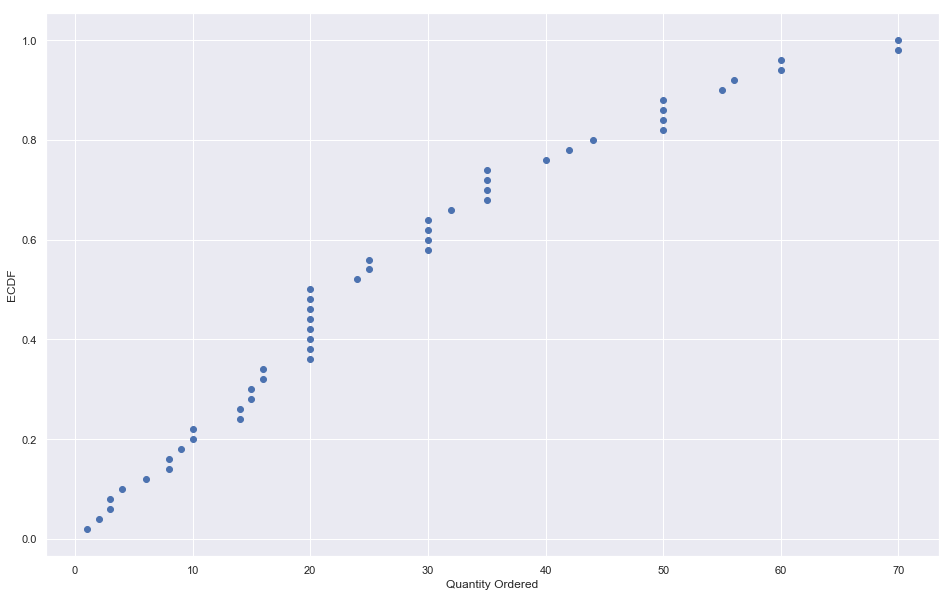

In [73]:
x, y = ecdf(gorgonzola_telino['Quantity'])
plt.figure(figsize=(16, 10))
_ = plt.scatter(x, y)
_ = plt.xlabel('Quantity Ordered')
_ = plt.ylabel('ECDF')
plt.show()

There is never a healthy supply of Gorgonzola Telino, let's take a look at the the other items that are on backorder.

In [74]:
perth_pasties = test_df2[(test_df2['ProductId'] == 53)]
perth_pasties.head()

,Id_x,OrderDate,RequiredDate,ShippedDate,OrderId,ProductId,Quantity,ProductName,Id_y,UnitsInStock,UnitsOnOrder,ReorderLevel,Discontinued,ProcessTime,TravelTime,TimeToDelivery
753,10256,2012-07-15,2012-08-12,2012-07-17,10256,53,15,Perth Pasties,53,0,0,0,1,2.0,20.0,28
754,10285,2012-08-20,2012-09-17,2012-08-26,10285,53,36,Perth Pasties,53,0,0,0,1,6.0,19.0,28
755,10306,2012-09-16,2012-10-14,2012-09-23,10306,53,10,Perth Pasties,53,0,0,0,1,7.0,26.0,28
756,10312,2012-09-23,2012-10-21,2012-10-03,10312,53,20,Perth Pasties,53,0,0,0,1,10.0,3.0,28
757,10380,2012-12-12,2013-01-09,2013-01-16,10380,53,20,Perth Pasties,53,0,0,0,1,35.0,34.0,28


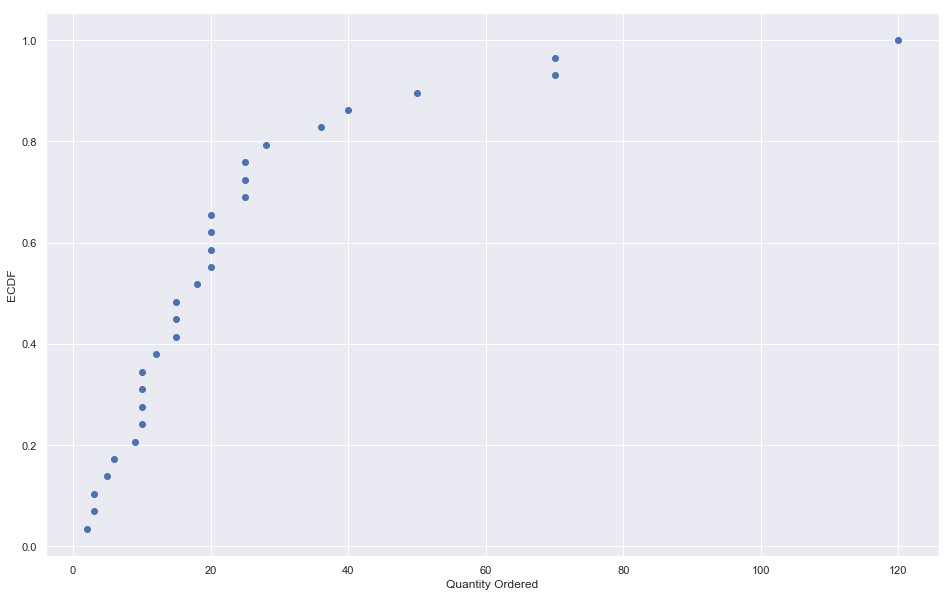

In [75]:
x, y = ecdf(perth_pasties['Quantity'])
plt.figure(figsize=(16, 10))
_ = plt.scatter(x, y)
_ = plt.xlabel('Quantity Ordered')
_ = plt.ylabel('ECDF')
plt.show()

In [76]:
alice_mutton = test_df2[(test_df2['ProductId'] == 17)]
alice_mutton.head()

,Id_x,OrderDate,RequiredDate,ShippedDate,OrderId,ProductId,Quantity,ProductName,Id_y,UnitsInStock,UnitsOnOrder,ReorderLevel,Discontinued,ProcessTime,TravelTime,TimeToDelivery
1134,10265,2012-07-25,2012-08-22,2012-08-12,10265,17,30,Alice Mutton,17,0,0,0,1,18.0,20.0,28
1135,10279,2012-08-13,2012-09-10,2012-08-16,10279,17,15,Alice Mutton,17,0,0,0,1,3.0,21.0,28
1136,10294,2012-08-30,2012-09-27,2012-09-05,10294,17,15,Alice Mutton,17,0,0,0,1,6.0,22.0,28
1137,10302,2012-09-10,2012-10-08,2012-10-09,10302,17,40,Alice Mutton,17,0,0,0,1,29.0,26.0,28
1138,10319,2012-10-02,2012-10-30,2012-10-11,10319,17,8,Alice Mutton,17,0,0,0,1,9.0,21.0,28


In [77]:
alice_mutton[alice_mutton['UnitsOnOrder'] > 0]

,Id_x,OrderDate,RequiredDate,ShippedDate,OrderId,ProductId,Quantity,ProductName,Id_y,UnitsInStock,UnitsOnOrder,ReorderLevel,Discontinued,ProcessTime,TravelTime,TimeToDelivery


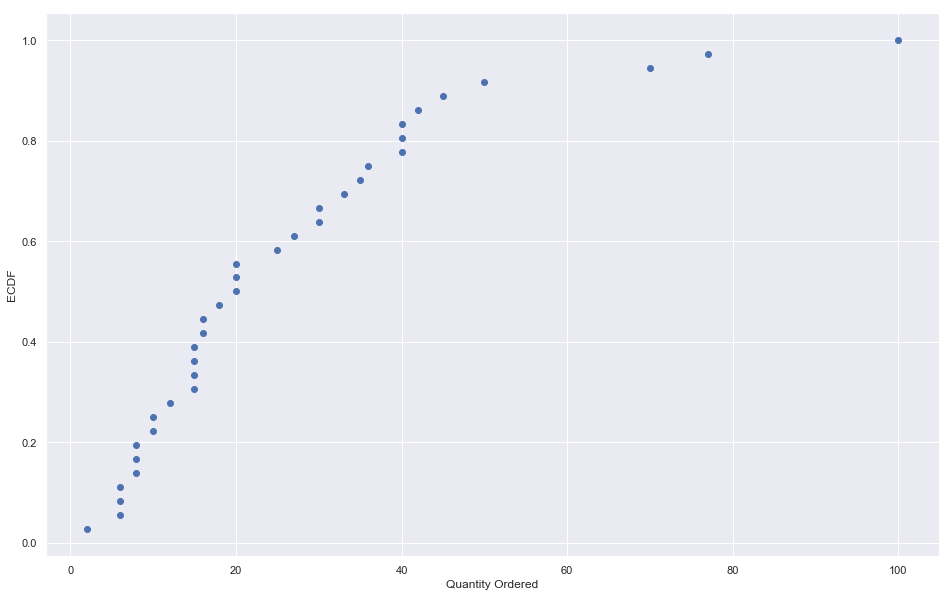

In [78]:
x, y = ecdf(alice_mutton['Quantity'])
plt.figure(figsize=(16, 10))
_ = plt.scatter(x, y)
_ = plt.xlabel('Quantity Ordered')
_ = plt.ylabel('ECDF')
plt.show()

### Reasons for late shipments

* Discontinued products that customers could still order
* Lack of inventory

### Finding Orders Per Week

In [79]:
gorgonzola_telino['OrderDate'] = gorgonzola_telino['OrderDate'].dt.week
gorgonzola_telino.set_index('OrderDate', inplace=True)

C:\Users\nitdip\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [80]:
weeks = gorgonzola_telino.groupby(by='OrderDate')

In [81]:
# looking to how many orders are placed during each month.
# we know that each order contains 70 units and the reorder level is 20.

#Using the .agg() method to show the size(how many orders per week), sum, and mean of each week.
weeks['Quantity'].agg(['size', 'sum', 'mean'])

,size,sum,mean
OrderDate,,,
1,1,16,16.000000
2,1,35,35.000000
3,1,9,9.000000
4,1,14,14.000000
5,1,14,14.000000
7,2,38,19.000000
11,4,139,34.750000
12,1,25,25.000000
13,1,24,24.000000


### Hacker Statistics

To find the true mean of the data we'll use hacker statistics again to do 10,000 simulations of the data.

In [82]:
gorg_weekly = weeks['Quantity'].sum()
gorg_weekly

OrderDate
1      16
2      35
3       9
4      14
5      14
7      38
11    139
12     25
13     24
14     20
15     15
20     50
22     85
24    101
25     20
26     50
28     20
31     55
36     20
37      8
39     20
41      4
42     20
43     25
44    106
45      3
46     30
47     78
48     20
49    122
50     88
51     71
52     32
Name: Quantity, dtype: int64

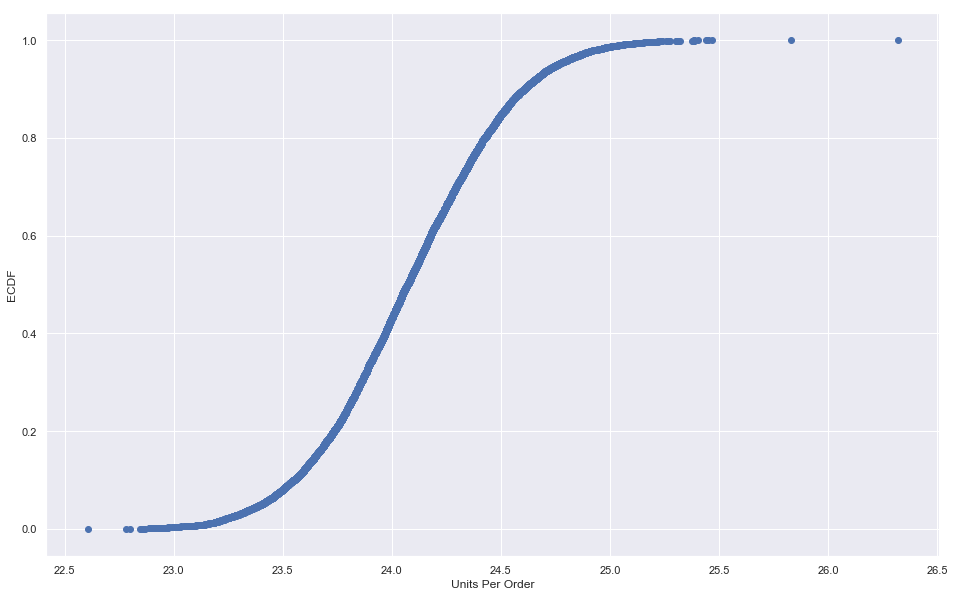

In [83]:
gorg_sample = bootstrap_sample(test_df2['Quantity'], np.mean, 10000)
x, y = ecdf(gorg_sample)
_ = plt.figure(figsize=(16, 10))
_ = plt.scatter(x=x, y=y)
_ = plt.xlabel('Units Per Order')
_ = plt.ylabel('ECDF')
plt.show();

In [84]:
# mean of the actual data
gorgonzola_mean_actual = np.mean(gorgonzola_telino['Quantity'])
print(gorgonzola_mean_actual)

27.54


### Hypothesis Test # 3

> $H_0 \leq \mu_0$ $H_0$: The mean weekly orders for gorgonzola is at most 27

>$H_1 > \mu_1$ $H_1$: The mean weekly orders for gorgonzola is more than 27

### Permutation Test

In [85]:
permutation_arr = np.empty(10000)

for i in range(10000):
    sample = bootstrap_sample(weeks['Quantity'].sum(), np.mean)
    permutation_arr[i] = np.mean(sample)
p_value = np.sum(permutation_arr <= 27) / len(permutation_arr)

if p_value <= 0.05:
    print(f'P-value: {p_value}, Reject null hypothesis')
else:
    print(f'P-value: {p_value}, Fail to reject null hypothesis')

P-value: 0.0062, Reject null hypothesis


We reject the null hypothesis. The weekly orders are greater than 27. To have a healthy stock of Gorgonzola inventories need to be at least 27.

Since the average order per week is 27, that means that the current reorder level at 20 is too low, and/or UnitOnOrder is too low. These two features together state the following:

When stock is at least 20 or 70 more of the product.

This brings us to our next hypothesis:

### Hypothesis #4

> $H_0 \geq mu_0$: The mean order level of 70 is $\geq$ to the mean weekly orders

> $H_1 \leq mu_1$: The mean order level of 70 is $\leq$ to the mean weekly orders
---

In [96]:
permutation_arr = np.empty(10000)

for i in range(10000):
    sample = bootstrap_sample(weeks['Quantity'].sum(), np.mean)
    permutation_arr[i] = np.mean(sample)
p_value = np.sum(permutation_arr <= 70) / len(permutation_arr)

if p_value <= 0.05:
    print(f'P-value: {p_value}, Reject null hypothesis')
else:
    print(f'P-value: {p_value}, Fail to reject null hypothesis')

P-value: 1.0, Fail to reject null hypothesis


In [98]:
print(permutation_arr.mean())

41.65785151515151


Since we failed to reject the null hypothesis, it means that the UnitsOnOrder is enough for the weekly order by customers. The next hypothesis to test is whether the ReorderLevel is high enough to avoid delays.

In [99]:
permutation_arr = np.empty(10000)

for i in range(10000):
    sample = bootstrap_sample(weeks['Quantity'].sum(), np.mean)
    permutation_arr[i] = np.mean(sample)
p_value = np.sum(permutation_arr <= 20) / len(permutation_arr)

if p_value <= 0.05:
    print(f'P-value: {p_value}, Reject null hypothesis')
else:
    print(f'P-value: {p_value}, Fail to reject null hypothesis')

P-value: 0.0, Reject null hypothesis


With the above permutation test, the average weekly orders are more than the reorder level. To decrease the amount of backorders let's set the reorder level to 50.

In [104]:
#finding the 95th percentile of weekly orders
np.percentile(permutation_arr, [2.5, 97.5])

array([30.21212121, 54.63712121])

In [105]:
# permutation test for the lower bound of 30 weekly orders.
permutation_arr = np.empty(10000)

for i in range(10000):
    sample = bootstrap_sample(weeks['Quantity'].sum(), np.mean)
    permutation_arr[i] = np.mean(sample)
p_value = np.sum(permutation_arr <= 30) / len(permutation_arr)

if p_value <= 0.05:
    print(f'P-value: {p_value}, Reject null hypothesis')
else:
    print(f'P-value: {p_value}, Fail to reject null hypothesis')

P-value: 0.0253, Reject null hypothesis


In [107]:
# permutation test for the upper bound of 50 weekly orders.
permutation_arr = np.empty(10000)

for i in range(10000):
    sample = bootstrap_sample(weeks['Quantity'].sum(), np.mean)
    permutation_arr[i] = np.mean(sample)
p_value = np.sum(permutation_arr <= 54) / len(permutation_arr)

if p_value <= 0.05:
    print(f'P-value: {p_value}, Reject null hypothesis')
else:
    print(f'P-value: {p_value}, Fail to reject null hypothesis')

P-value: 0.9689, Fail to reject null hypothesis


If we increased the reorder level to 30, it's still not enough to decrease the amount of backorders. 

Increasing the reorder level to the upper bound of 54 indicates that 96.89% of orders will be successfully filled for Gorgonzola.